In [17]:
# Dependencies
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Loading MNIST training data
x, y = torch.load('./mnist/processed/training.pt')

In [23]:
x

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [24]:
x.shape

torch.Size([60000, 28, 28])

In [22]:
x.shape

torch.Size([60000, 28, 28])

In [26]:
x[2].shape

torch.Size([28, 28])

In [28]:
x.shape

torch.Size([60000, 28, 28])

In [36]:
## PyTorch Dataset object

class CTDataset(Dataset):
    def __init__(self, filepath):
        # load file
        self.x, self.y = torch.load(filepath)
        # normalize data to be between 0 and 1
        self.x = self.x / 255
        # apply one hot encoding to data
        self.y = F.one_hot(self.y, num_classes=10).to(float)
        
    def __len__(self):
        return self.x.shape[0]
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]

In [37]:
train_ds = CTDataset('./mnist/processed/training.pt')
test_ds = CTDataset('./mnist/processed/test.pt')

In [38]:
len(train_ds)

60000

In [41]:
train_ds[0]

(tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000,

In [42]:
xs, ys = train_ds[0:4]

In [46]:
# 4 images 
xs.shape

torch.Size([4, 28, 28])

In [47]:
# 4 one-hot encoded labels
ys.shape

torch.Size([4, 10])

In [48]:
ys[0]

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=torch.float64)

In [49]:
## PyTorch DataLoader Object

train_dl = DataLoader(train_ds, batch_size=5)

In [50]:
for x, y in train_dl:
    print(x.shape)
    print(y.shape)
    break

torch.Size([5, 28, 28])
torch.Size([5, 10])


In [53]:
# 12000 because dataloader set to batches of 5 and we have 60,000 images in dataset
len(train_dl)

12000

In [54]:
## Cross Entropy Loss

L = nn.CrossEntropyLoss()

In [55]:
## Defining the Neural Network

class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(28**2, 100)
        self.Matrix2 = nn.Linear(100,50)
        self.Matrix3 = nn.Linear(50, 10)
        self.R = nn.ReLU()
    def forward(self, x):
        x = x.view(-1, 28**2)
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.Matrix3(x)
        return x.squeeze()

In [56]:
f = MyNeuralNet()

In [59]:
xs.view(-1, 28**2)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [58]:
f(xs)

tensor([[ 0.0713, -0.1055,  0.0521,  0.0068,  0.0291, -0.0519,  0.0262, -0.1071,
         -0.0336, -0.1869],
        [ 0.0484, -0.1094,  0.0471,  0.0161,  0.0179, -0.0320,  0.0348, -0.1222,
         -0.0438, -0.2010],
        [ 0.0588, -0.1010,  0.0635,  0.0171,  0.0455, -0.0313,  0.0430, -0.1556,
         -0.0270, -0.2067],
        [ 0.0720, -0.0866,  0.0425,  0.0326,  0.0391, -0.0498,  0.0245, -0.1603,
         -0.0769, -0.1354]], grad_fn=<SqueezeBackward0>)

In [60]:
ys

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)

In [61]:
# Calculate loss
L(f(xs), ys)

tensor(2.2862, dtype=torch.float64, grad_fn=<DivBackward1>)

In [64]:
## Training Function

def train_model(dl, f, n_epochs=20):
    # Optimizer (stochastic gradient descent)
    opt = SGD(f.parameters(), lr = 0.01)
    
    # Loss function
    L = nn.CrossEntropyLoss()
    
    # Train model
    losses = []
    epochs = []
    for epoch in range(n_epochs):
        print(f'Epoch {epoch}')
        N = len(dl)
        for i, (x,y) in enumerate(dl):
            # Update the weights of network
            opt.zero_grad()
            loss_value = L(f(x), y)
            loss_value.backward()
            opt.step()
            
            # Store training data
            epochs.append(epoch+i/N)
            losses.append(loss_value.item())
    return np.array(epochs), np.array(losses)

In [65]:
# Training for 20 epochs
epoch_data, loss_data = train_model(train_dl, f)

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


Text(0.5, 1.0, 'Cross Entropy Loss (per batch)')

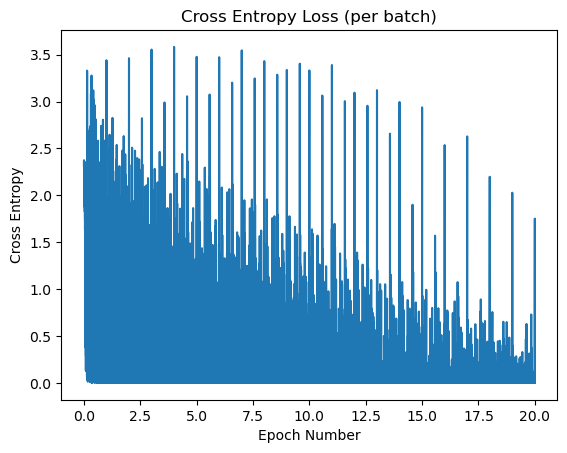

In [66]:
# Plotting the loss function for each batch (up to 20)
plt.plot(epoch_data, loss_data)
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy Loss (per batch)')

In [72]:
epoch_data.shape

(240000,)

In [78]:
# Above plot is very noisy but decreasing trend is visible

# Better way to plot is using average loss for each epoch.

# Transform the data from 24,000 elements to 20 rows of equal size to represent each epoch.
# Take the mean for each row
epoch_data_avgd = epoch_data.reshape(20,-1).mean(axis=1)
loss_data_avgd = loss_data.reshape(20,-1).mean(axis=1)

Text(0.5, 1.0, 'Cross Entropy (avg per epoch)')

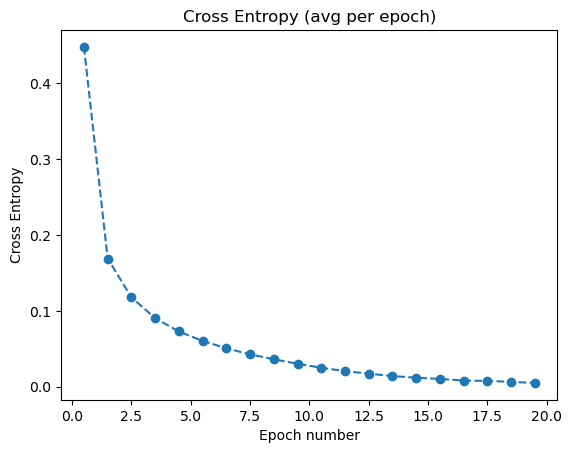

In [79]:
plt.plot(epoch_data_avgd, loss_data_avgd, 'o--')
plt.xlabel('Epoch number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy (avg per epoch)')

In [82]:
# Taking a look at a sample image label y
y_sample = train_ds[0][1]
y_sample

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=torch.float64)

In [83]:
# Taking a sample prediction yhat
x_sample = train_ds[0][0]
yhat_sample = f(x_sample)
yhat_sample
# Output is not normalized, the largest number is the most likely predicted class of number [0 - 9]

tensor([-11.3094,  -0.2895,  -6.0075,  30.1258, -28.6898,  36.9088, -12.8162,
         -1.4155,  -7.5789,   3.4105], grad_fn=<SqueezeBackward0>)

In [84]:
torch.argmax(yhat_sample)

tensor(5)

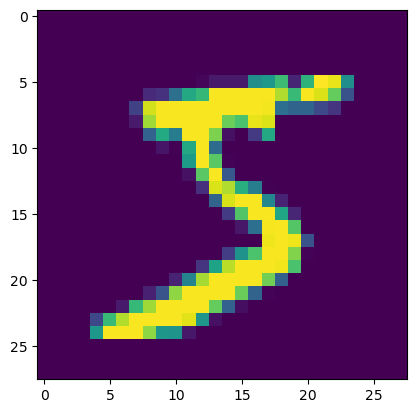

In [85]:
plt.imshow(x_sample)

In [90]:
# Testing with some more predictions using training set
xs, ys = train_ds[0:2000]
yhats = f(xs).argmax(axis=1)

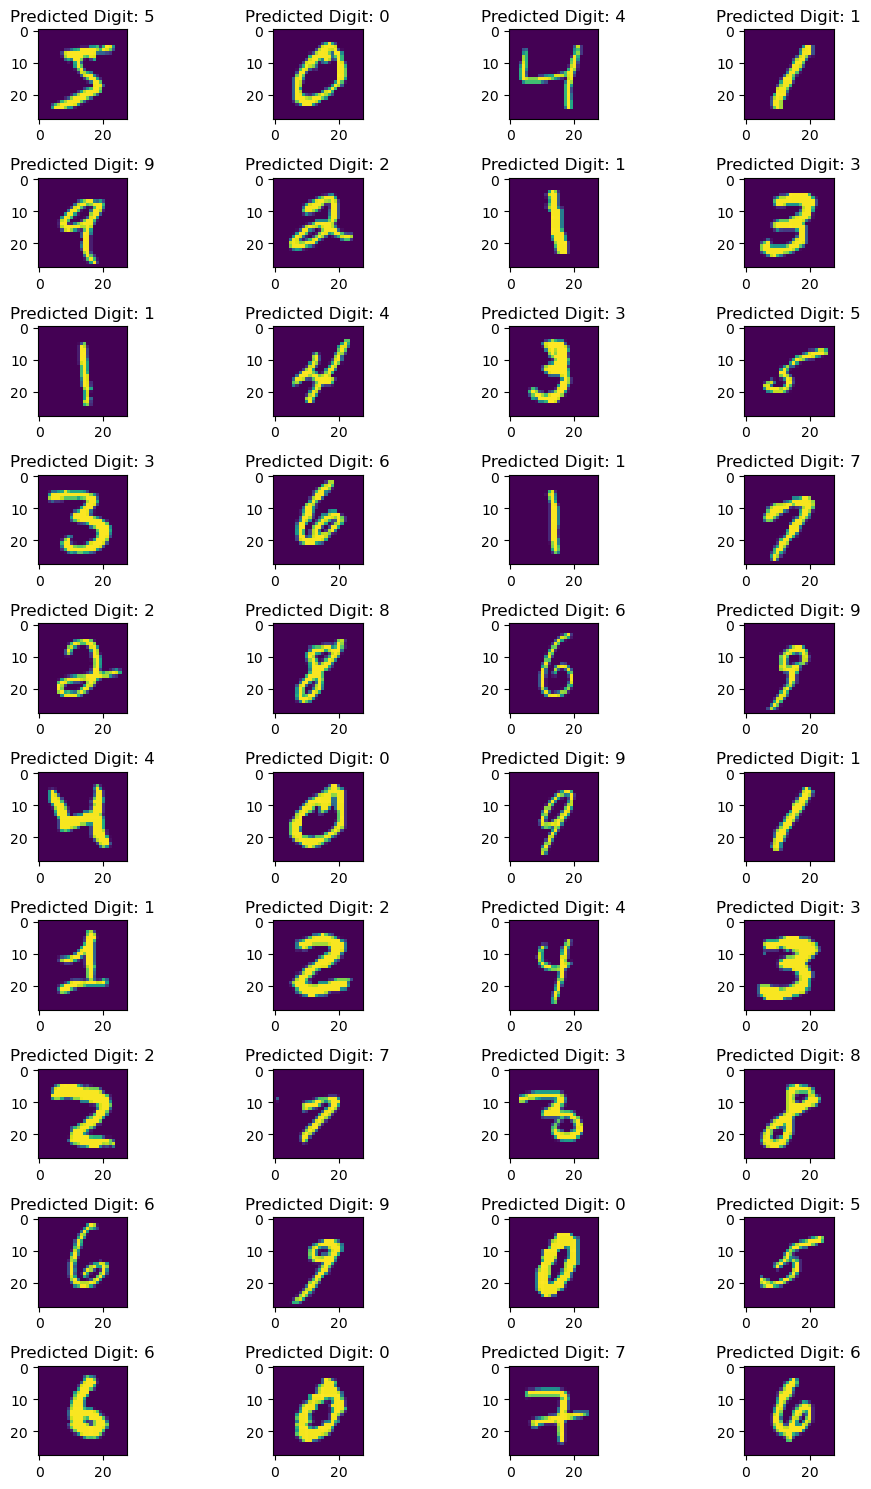

In [91]:
fig, ax = plt.subplots(10, 4, figsize=(10,15))
for i in range(40):
    plt.subplot(10,4, i+1)
    plt.imshow(xs[i])
    plt.title(f'Predicted Digit: {yhats[i]}')
fig.tight_layout()
plt.show()

In [88]:
ys.shape

torch.Size([2000, 10])

In [92]:
# Now lets test predictions some new images (test set)
xs, ys = test_ds[0:2000]
yhats = f(xs).argmax(axis=1)

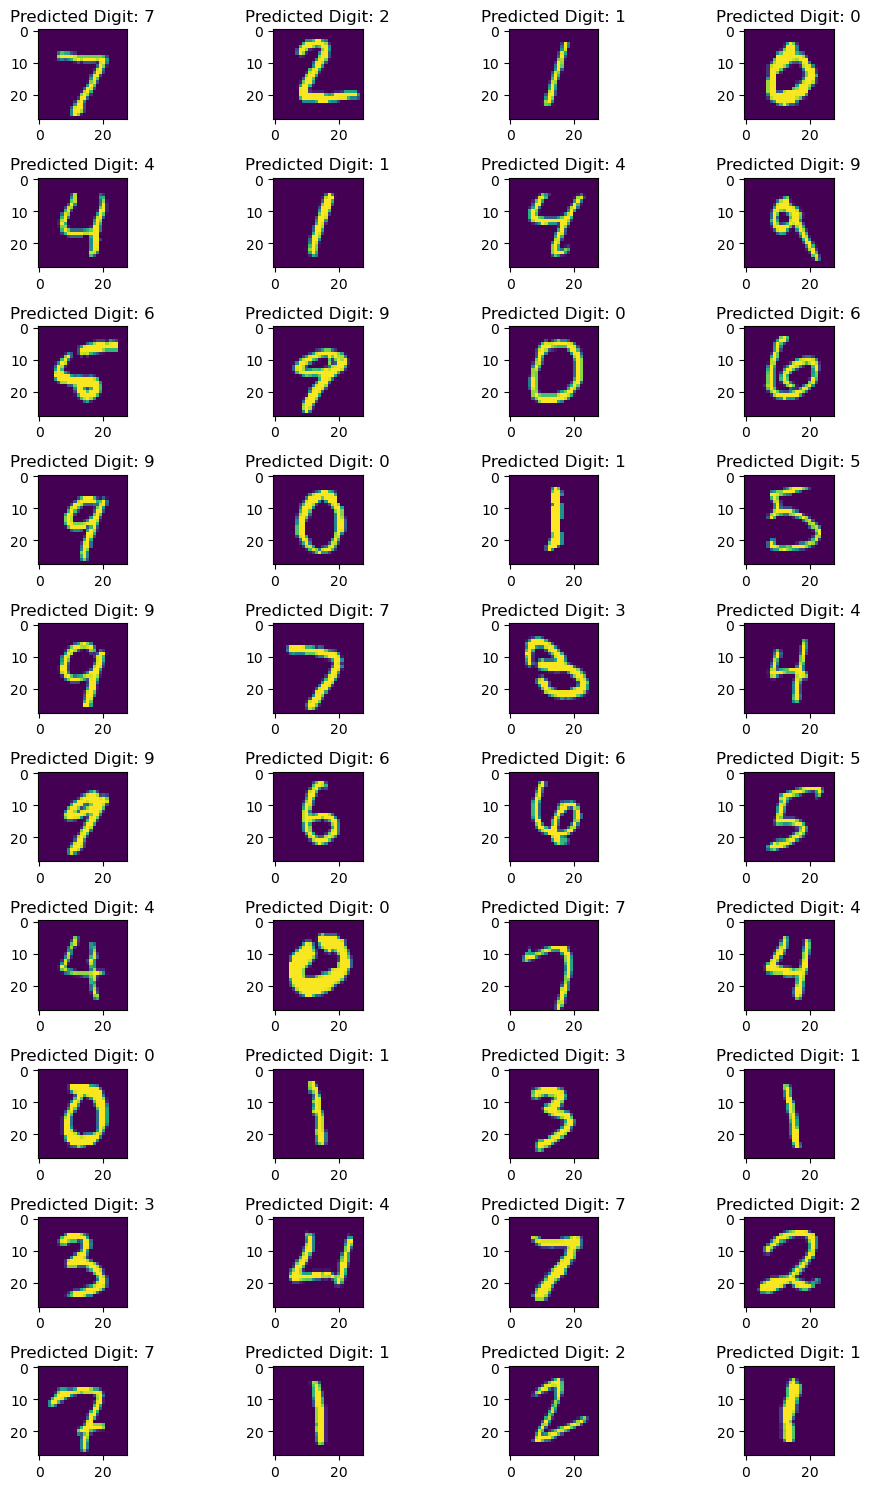

In [93]:
fig, ax = plt.subplots(10, 4, figsize=(10,15))
for i in range(40):
    plt.subplot(10,4, i+1)
    plt.imshow(xs[i])
    plt.title(f'Predicted Digit: {yhats[i]}')
fig.tight_layout()
plt.show()